## Project: Querying and Filtering Pokemon data
<center>
<img src="cover.jpg" >

</center>  

In [1]:


#from IPython.core.pylabtools import figsize
# This is how you can make a file downloadable
#from IPython.display import FileLink

# Create download links for the files
#print("Download CSV:")
#display(FileLink("pokemon.csv"))

#print("Download Image:")
#display(FileLink("cover.jpg"))
 

## Task 0 - Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("pokemon.csv")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
717,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           721 non-null    int64 
 1   Name        721 non-null    object
 2   Type 1      721 non-null    object
 3   Type 2      359 non-null    object
 4   Total       721 non-null    int64 
 5   HP          721 non-null    int64 
 6   Attack      721 non-null    int64 
 7   Defense     721 non-null    int64 
 8   Sp. Atk     721 non-null    int64 
 9   Sp. Def     721 non-null    int64 
 10  Speed       721 non-null    int64 
 11  Generation  721 non-null    int64 
 12  Legendary   721 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 68.4+ KB


In [5]:
missing_count = df.isnull().sum()  # Total missing values in each column
print(missing_count)

#               0
Name            0
Type 1          0
Type 2        362
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


### Distribution of pokemon types

<Axes: ylabel='count'>

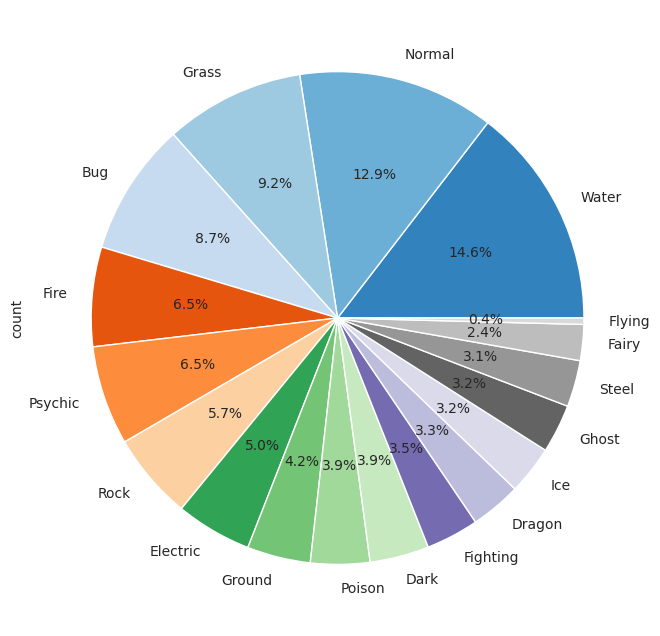

In [6]:
df['Type 1'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='tab20c', figsize=(10, 8))

### Distribution of Pokemon Totals:

<Axes: ylabel='Frequency'>

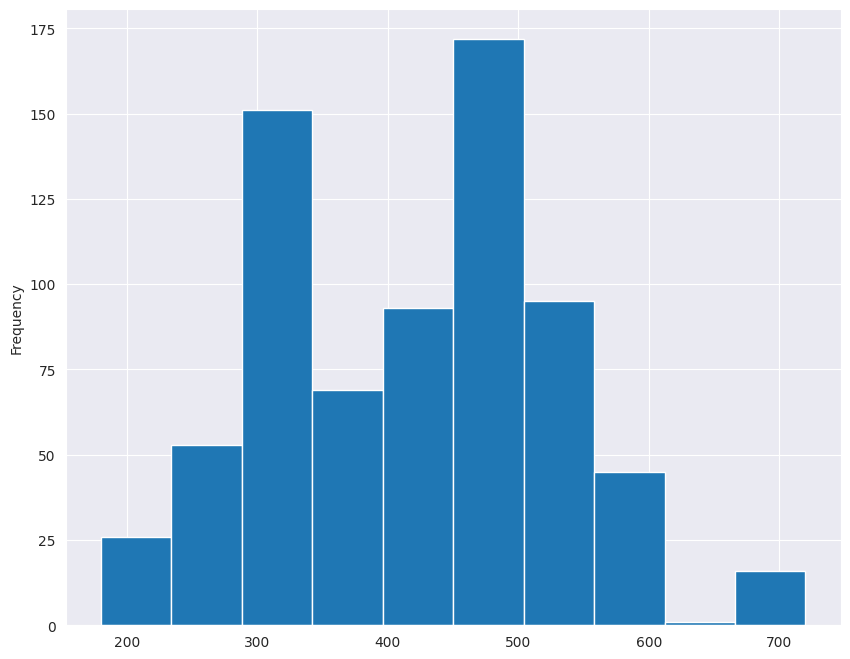

In [7]:
df['Total'].plot(kind='hist', figsize=(10, 8))

<Axes: >

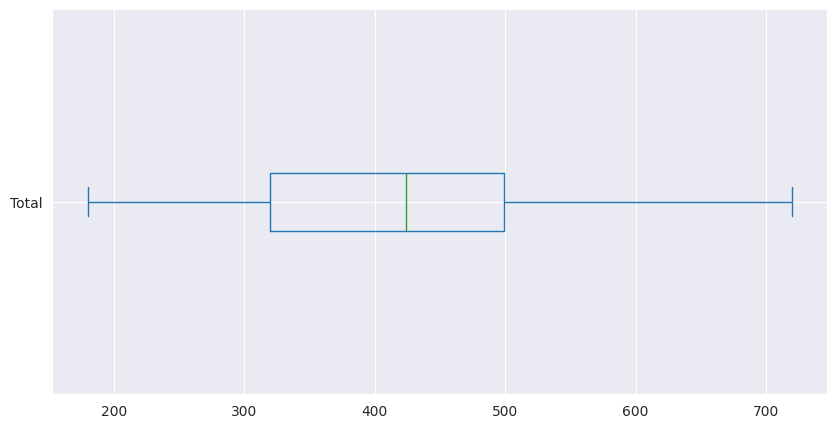

In [8]:
df['Total'].plot(kind='box', vert=False, figsize=(10, 5))

### Distribution of Legendary Pokemons:

<Axes: ylabel='count'>

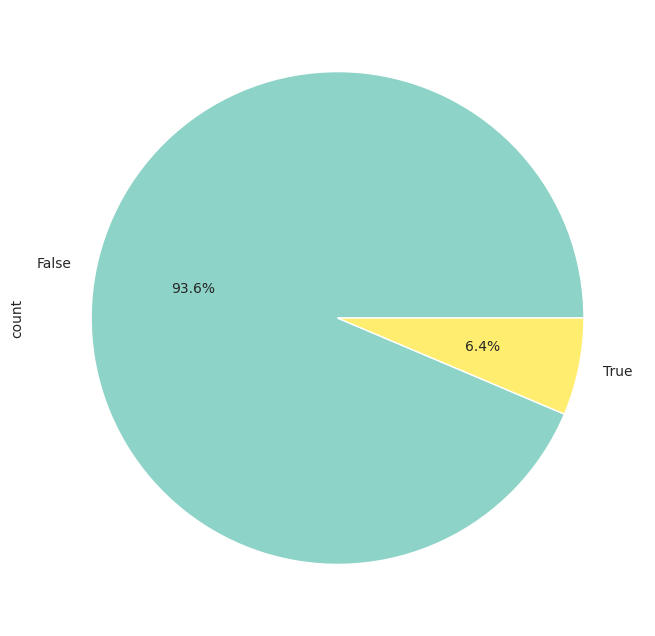

In [9]:
df['Legendary'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='Set3', figsize=(10, 8))

## Basic filtering

### 1. How many Pokemons exist with an `Attack` value greater than 150?

Doing a little bit of visual exploration, we can have a sense of the most "powerful" pokemons (defined by their "Attack" feature). A boxplot is a great way to visualize this:

<Axes: xlabel='Attack'>

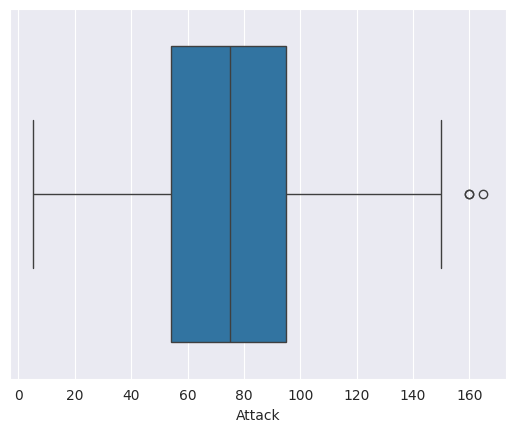

In [10]:
sns.boxplot(data=df, x='Attack')

In [11]:
df.loc[df["Attack"]>150]


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
288,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
408,409,Rampardos,Rock,NaN,495,97,165,60,65,50,58,4,False
485,486,Regigigas,Normal,NaN,670,110,160,110,80,110,100,4,True


In [12]:
(df["Attack"]>150).sum()

np.int64(3)

In [13]:
df.query("Attack >150")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
288,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
408,409,Rampardos,Rock,NaN,495,97,165,60,65,50,58,4,False
485,486,Regigigas,Normal,NaN,670,110,160,110,80,110,100,4,True


### 2. Select all the pokemons with a speed of 10 or less

<Axes: xlabel='Speed'>

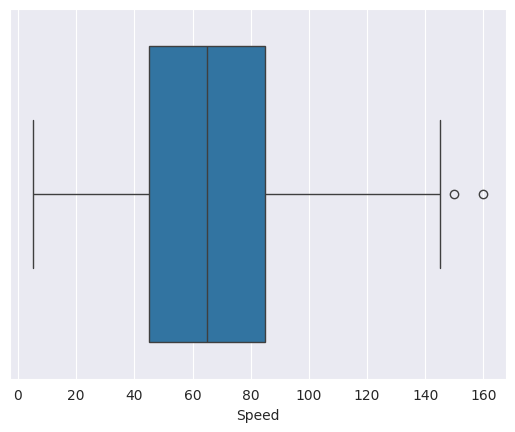

In [14]:
sns.boxplot(data=df, x="Speed")

In [15]:
df.loc[df["Speed"]<=10]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
212,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
327,328,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
437,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
445,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
596,597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False


In [16]:
slow_pokemons = df.loc[df["Speed"]<=10]
slow_pokemons

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
212,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
327,328,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
437,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
445,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
596,597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False


### 3. How many pokemons have a Sp. Def value of 25 or less?

In [17]:
(df["Sp. Def"]<=25).sum()

np.int64(17)

In [18]:
df.loc[df["Sp. Def"]<=25]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
10,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,False
12,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
13,14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False
38,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
89,90,Shellder,Water,NaN,305,30,65,100,45,25,40,1,False
97,98,Krabby,Water,NaN,325,30,105,90,25,25,50,1,False
115,116,Horsea,Water,NaN,295,30,40,70,70,25,60,1,False
128,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
173,174,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,2,False


## 4. Select all the legendary pokemons

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           721 non-null    int64 
 1   Name        721 non-null    object
 2   Type 1      721 non-null    object
 3   Type 2      359 non-null    object
 4   Total       721 non-null    int64 
 5   HP          721 non-null    int64 
 6   Attack      721 non-null    int64 
 7   Defense     721 non-null    int64 
 8   Sp. Atk     721 non-null    int64 
 9   Sp. Def     721 non-null    int64 
 10  Speed       721 non-null    int64 
 11  Generation  721 non-null    int64 
 12  Legendary   721 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 68.4+ KB


In [20]:
df.loc[df["Legendary"]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
143,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
144,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
145,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
149,150,Mewtwo,Psychic,Fighting,680,106,110,90,154,90,130,1,True
242,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
243,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
244,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
248,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
249,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
376,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True


### 5. Find the outlier
Find the pokemon that is clearly an outlier in terms of Attack / Defense:
Take a look at the scatterplot that correlates pokemons Attack and Defense. What's the Name of the pokemon that is a clear outlier (strong Defense, but very low Attack).

Text(150, 10, "Who's this guy?")

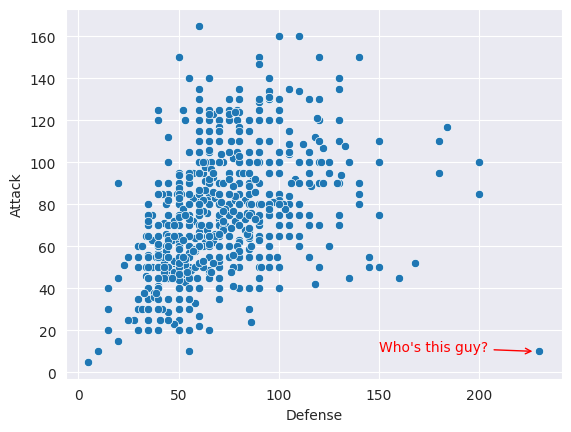

In [21]:
ax = sns.scatterplot(data=df, x="Defense", y="Attack")
ax.annotate(
    "Who's this guy?", xy=(228, 10), xytext=(150, 10), color='red',
    arrowprops=dict(arrowstyle="->", color='red')
)

In [22]:
df.sort_values(by=['Defense',"Attack"], ascending=[False,True])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
212,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
207,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
376,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
712,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
90,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,238,Smoochum,Ice,Psychic,305,45,30,15,85,65,65,2,False
171,172,Pichu,Electric,NaN,205,20,40,15,35,35,60,2,False
241,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
112,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False


## Advanced selection

### 6. How many pokemons are of Type 1 Fire and Type 2 Flying?

In [23]:
((df["Type 1"]=="Fire")  & (df["Type 2"]=="Flying")).sum()

np.int64(5)

In [24]:
df.loc[(df["Type 1"]=="Fire")  & (df["Type 2"]=="Flying")]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
145,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
249,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
661,662,Fletchinder,Fire,Flying,382,62,73,55,56,52,84,6,False
662,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False


### 7. How many 'Poison' pokemons are across both types?
How many pokemons exist that are of type Poison in either Type 1 or Type 2?

In [25]:
(df["Type 1"]=="Poison").value_counts()

Type 1
False    693
True      28
Name: count, dtype: int64

In [26]:
(df["Type 2"] == "Poison").value_counts()

Type 2
False    690
True      31
Name: count, dtype: int64

In [27]:
(df["Type 1"]=="Poison")

0      False
1      False
2      False
3      False
4      False
       ...  
716    False
717    False
718    False
719    False
720    False
Name: Type 1, Length: 721, dtype: bool

In [28]:
df.loc[(df["Type 1"]=="Poison")|(df["Type 2"]=="Poison")]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
12,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
13,14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False
14,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False
22,23,Ekans,Poison,NaN,288,35,60,44,40,54,55,1,False
23,24,Arbok,Poison,NaN,438,60,85,69,65,79,80,1,False
28,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False
29,30,Nidorina,Poison,NaN,365,70,62,67,55,55,56,1,False


### 8. What pokemon of Type 1 Ice has the strongest defense?

In [29]:
df.loc[df["Type 1"]=="Ice", "Defense"].max()

np.int64(184)

In [30]:
df.loc[
    (df["Type 1"]=="Ice")&(df["Defense"]==df.loc[df["Type 1"]=="Ice", "Defense"].max())
]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
712,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


In [31]:
df.loc[df["Type 1"]=="Ice"].sort_values(by=["Defense"], ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
712,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
470,471,Glaceon,Ice,NaN,525,65,60,110,130,95,65,4,False
143,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
377,378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
364,365,Walrein,Ice,Water,530,110,80,90,95,90,65,3,False
711,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
583,584,Vanilluxe,Ice,NaN,535,71,95,85,110,95,79,5,False
613,614,Beartic,Ice,NaN,485,95,110,80,70,80,50,5,False
220,221,Piloswine,Ice,Ground,450,100,100,80,60,60,50,2,False
472,473,Mamoswine,Ice,Ground,530,110,130,80,70,60,80,4,False


### What's the most common `Type 1` of legendary pokemons?

In [32]:
df.loc[df["Legendary"],"Type 1"].value_counts()

Type 1
Psychic     8
Dragon      7
Fire        5
Steel       4
Water       3
Rock        3
Electric    3
Ice         2
Ground      2
Normal      2
Dark        2
Grass       2
Ghost       1
Flying      1
Fairy       1
Name: count, dtype: int64

<Axes: xlabel='Type 1'>

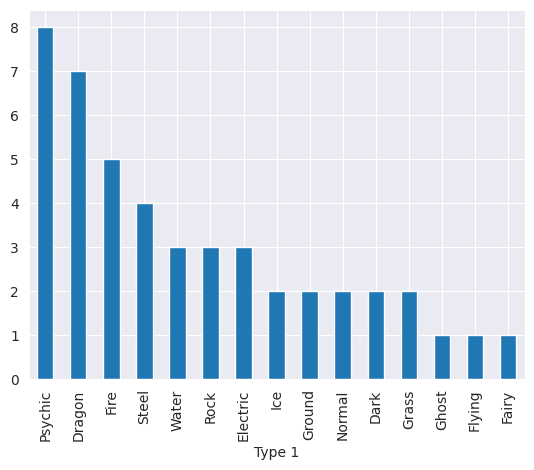

In [33]:
df.loc[df["Legendary"], "Type 1"].value_counts().plot(kind="bar")

### What is the most powerful pokemon from the first 3 generations of type water?
`Total` column will give you the most powerful pokemon

In [34]:

df.loc[df["Type 1"]=="Water"]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
53,54,Psyduck,Water,NaN,320,50,52,48,65,50,55,1,False
54,55,Golduck,Water,NaN,500,80,82,78,95,80,85,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,656,Froakie,Water,NaN,314,41,56,40,62,44,71,6,False
656,657,Frogadier,Water,NaN,405,54,63,52,83,56,97,6,False
657,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False
691,692,Clauncher,Water,NaN,330,50,53,62,58,63,44,6,False


In [35]:
18+24+28

70

<Axes: xlabel='Generation'>

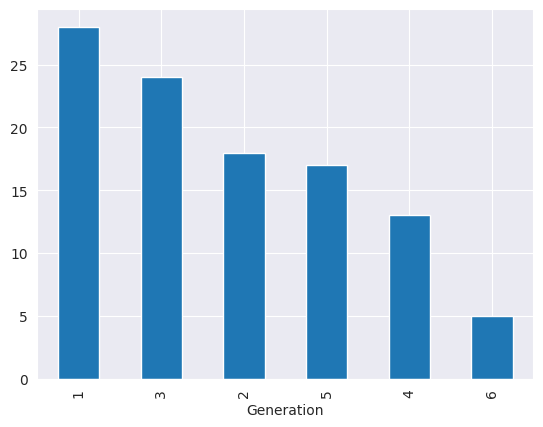

In [36]:
answer_counts=70
df.loc[df["Type 1"]=="Water", "Generation"].value_counts().plot(kind="bar")


<Axes: xlabel='Generation'>

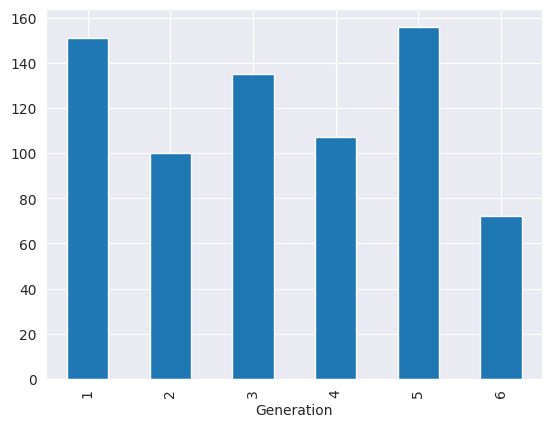

In [37]:
df["Generation"].value_counts(sort=False).plot(kind="bar")

In [38]:

df.loc[(df["Type 1"] == "Water") & ((df["Generation"] == 1) | (df["Generation"] == 2) | (df["Generation"] == 3))].sort_values(by=["Total"], ascending=False)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
381,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
244,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
349,350,Milotic,Water,NaN,540,95,60,79,100,125,81,3,False
129,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
229,230,Kingdra,Water,Dragon,540,75,95,95,95,95,85,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,183,Marill,Water,Fairy,250,70,20,50,20,50,40,2,False
269,270,Lotad,Water,Grass,220,40,30,30,40,50,30,3,False
193,194,Wooper,Water,Ground,210,55,45,45,25,25,15,2,False
128,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False


In [39]:
df.loc[(df["Type 1"]=="Water")&(df["Generation"].isin([1,2,3]))].sort_values(by=["Total"],ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
381,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
244,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
349,350,Milotic,Water,NaN,540,95,60,79,100,125,81,3,False
129,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
229,230,Kingdra,Water,Dragon,540,75,95,95,95,95,85,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,183,Marill,Water,Fairy,250,70,20,50,20,50,40,2,False
269,270,Lotad,Water,Grass,220,40,30,30,40,50,30,3,False
193,194,Wooper,Water,Ground,210,55,45,45,25,25,15,2,False
128,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False


In [40]:
df["Generation"].isin([1,2,3])

0       True
1       True
2       True
3       True
4       True
       ...  
716    False
717    False
718    False
719    False
720    False
Name: Generation, Length: 721, dtype: bool

In [41]:
df["Generation"].isin([1,2,3]).value_counts()

Generation
True     386
False    335
Name: count, dtype: int64

### What is the most powerful Dragon from the last two generations

Find the most powerful pokemon (by `Total`) that is of type Dragon (either `Type 1` or `Type 2` ) and from the last two generations

In [42]:
df.loc[((df["Type 1"]=="Dragon")|(df["Type 2"]=="Dragon"))&(df["Generation"].isin([5,6]))].sort_values(by=["Total"], ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
643,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True
642,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True
645,646,Kyurem,Dragon,Ice,660,125,130,90,130,90,95,5,True
705,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
717,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
634,635,Hydreigon,Dark,Dragon,600,92,105,90,125,90,98,5,False
611,612,Haxorus,Dragon,NaN,540,76,147,90,60,70,97,5,False
714,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
696,697,Tyrantrum,Rock,Dragon,521,82,121,119,69,59,71,6,False
690,691,Dragalge,Poison,Dragon,494,65,75,90,97,123,44,6,False


### Select the mos t powerful Fire-Type pokemons
Select all pokemons that have an `Attack` value above 100 and `Type 1` equals to `Fire` (ignore `Type 2`)

In [43]:
df.loc[(df["Type 1"]=="Fire")&(df["Attack"]>100)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
58,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False
135,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,1,False
243,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
249,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
256,257,Blaziken,Fire,Fighting,530,80,120,70,110,70,80,3,False
391,392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False
499,500,Emboar,Fire,Fighting,528,110,123,65,100,65,65,5,False
554,555,DarmanitanStandard Mode,Fire,Psychic,480,105,140,55,30,55,95,5,False
720,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


### Select all Water-type, flying type pokemons

Select all pokemons that are of `Type 1 ` Water and `Type 2` Flying. Store the selection in the variable `water_flying_df`

In [44]:
water_flying_df=df.loc[(df["Type 1"]=="Water")&(df["Type 2"]=="Flying")]
water_flying_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
129,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
225,226,Mantine,Water,Flying,465,65,40,70,80,140,70,2,False
277,278,Wingull,Water,Flying,270,40,30,30,55,30,85,3,False
278,279,Pelipper,Water,Flying,430,60,50,100,85,70,65,3,False
457,458,Mantyke,Water,Flying,345,45,20,50,60,120,50,4,False
579,580,Ducklett,Water,Flying,305,62,44,50,44,50,55,5,False
580,581,Swanna,Water,Flying,473,75,87,63,87,63,98,5,False


### Select specific columns of Legendary pokemnos of type fire
Perform a selection inyour Dataframe of all the legendary pokemons that are of type 1 Fire. But select only the columns `Name`, `Attack`, and `Generation`

In [45]:
df.loc[(df["Type 1"]=="Fire")&(df["Legendary"]),["Generation","Name","Attack"]]

,Generation,Name,Attack
145,1,Moltres,100
243,2,Entei,115
249,2,Ho-oh,130
484,4,Heatran,90
720,6,Volcanion,110


### Select Slow and Fast pokemons
Red lines separte the slowest (bottom 5%) and fastest (top 5%) pokemons
Select thos that are either very slow (with Speed below the bottom 5% ) or very fast (Speed above top 5%)

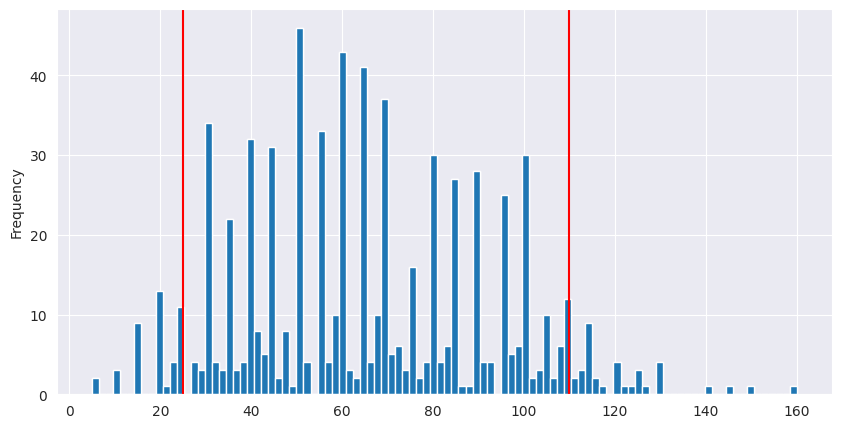

In [46]:
ax = df["Speed"].plot(kind="hist", figsize=(10,5), bins=100, color="green")
ax.axvline(df["Speed"].quantile(0.05), color="red")
ax = df["Speed"].plot(kind="hist", figsize=(10, 5), bins=100)
ax.axvline(df["Speed"].quantile(0.95), color="red")

In [47]:
bottom_5 =df["Speed"].quantile(0.05)
top_5=df["Speed"].quantile(0.95)
bottom_5, top_5

(np.float64(25.0), np.float64(110.0))

In [48]:
df.loc[(df["Speed"]<bottom_5)|(df["Speed"]>top_5)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
38,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
50,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False
52,53,Persian,Normal,NaN,440,65,70,60,65,65,115,1,False
64,65,Alakazam,Psychic,NaN,500,55,50,45,135,95,120,1,False
73,74,Geodude,Rock,Ground,300,40,80,100,30,30,20,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False
662,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False
681,682,Spritzee,Fairy,NaN,341,78,52,60,63,65,23,6,False
700,701,Hawlucha,Fighting,Flying,500,78,92,75,74,63,118,6,False


### 16 Find the ultra powerful legendary pokemon
Take a look at the scatterplot correlation Defense to Attack. Whats the name of the pokemon indicated by the red arrow in the image below?

<Axes: xlabel='Defense', ylabel='Attack'>

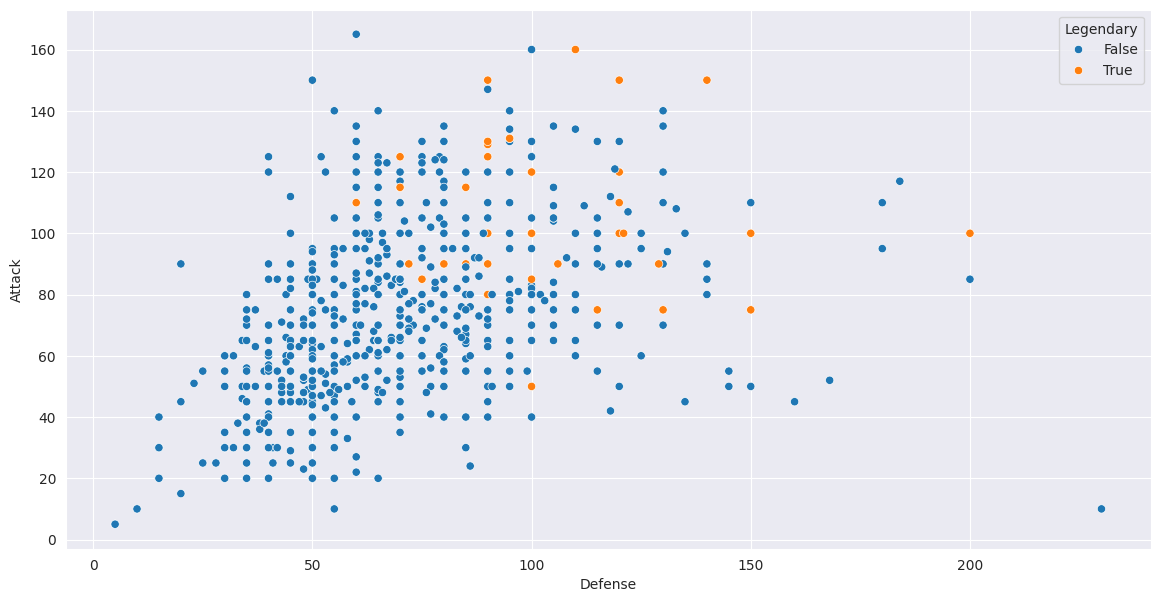

In [49]:
fig, ax = plt.subplots(figsize=(14,7))
sns.scatterplot(data=df, x="Defense", y="Attack", hue ="Legendary", ax=ax)

In [50]:
df.loc[df["Legendary"]].sort_values(by=["Attack","Defense"], ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
485,486,Regigigas,Normal,NaN,670,110,160,110,80,110,100,4,True
382,383,Groudon,Ground,Fire,670,100,150,140,100,90,90,3,True
643,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True
383,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True
385,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
715,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
249,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
645,646,Kyurem,Dragon,Ice,660,125,130,90,130,90,95,5,True
638,639,Terrakion,Rock,Fighting,580,91,129,90,72,90,108,5,True


In [51]:
df.sort_values(by=["Defense", "Attack"], ascending=[False,False])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
212,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
376,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
207,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
712,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
305,306,Aggron,Steel,Rock,530,70,110,180,60,60,50,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,238,Smoochum,Ice,Psychic,305,45,30,15,85,65,65,2,False
62,63,Abra,Psychic,NaN,310,25,20,15,105,55,90,1,False
241,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
112,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
